# Compartimental Model Simulator

**Created by:** Samuel Ropert  
**Creation date:** 04/08/2020  
**Institution:** Computational Biology Lab - Fundación Ciencia y Vida, Chile  

## SEIR
This file documents the way of simulating a SEIR compartimental model using the libraries devolped by the laboratory


## Import Libraries

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, '../src/')
sys.path.insert(1, 'src/')
from SEIRmodel import SEIRmodel
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

## Epidemiological Parameters

In [2]:
beta = 0.2 # Tasa de contagio
mu = 0 # Razon E0/I0
ScaleFactor = 1 # Factor de Escala: Numero de infectados por sobre los reportados
SeroPrevFactor = 1 # Sero Prevalence Factor. Permite ajustar la cantidad de gente que entra en la dinamica
expinfection = 1 # Proporcion en la que contagian los expuestos

## Simulation Parameters

In [3]:
# Simulation time
tsim = 1000
# Population
population = 1000000
nm = int(population/100000) #Number of 100k people
# Initial Active Infected 
I_act0 = 100


In [4]:
# Quarantines
# [Tsim, max_mov,rem_mov,quarantine period, quarantine initial time, quarantine final time, quarantine type]
max_mob = 0.85
rem_mob = [0.6,0.65,0.7]
quarantine_period = 0
quarantine_type = 0 #0: Single total quarantine - 1: alternating quarantine with quarantine_period period
quarantine_init_day = 0
quarantine_final_day = tsim
# Define one quarantine array for each different quarantine remanent mobility
quarantines = [[tsim, max_mob, alpha, quarantine_period, quarantine_init_day, quarantine_final_day, quarantine_type] for alpha in rem_mob]

In [5]:
# Kinetic Saturation: 0 for mass action mixing
k=0

## Create simulation Object

In [8]:
simulation = SEIRmodel(beta = beta,mu = mu,ScaleFactor=ScaleFactor,SeroPrevFactor=SeroPrevFactor,expinfection=expinfection,tsim = tsim,tstate='', k = k)
simulation.inputarray = np.array(quarantines)
simulation.addquarantine()
simulation.initialvalues(I_act0,population,R=0)

Set initial values


In [9]:
simulation.simulate()

SEIR Model
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.6s finished


## Simulation Analysis

### Plots

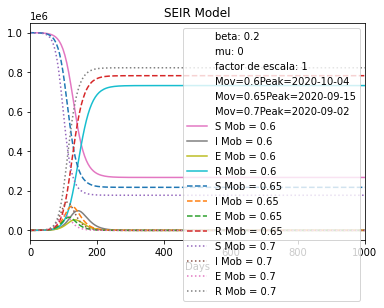

In [10]:
simulation.plotseir()


In [ ]:
simulation.peak
simulation.peak_t

In [ ]:
sys.path.insert(1, 'src/')

In [ ]:

from SEIRHVD_local import SEIRHVD_local